In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62102f6dc77e19ba47a883e9df6ec4d3


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | ancud
Processing Record 2 of Set 13 | maryville
Processing Record 3 of Set 13 | hasaki
Processing Record 4 of Set 13 | arraial do cabo
Processing Record 5 of Set 13 | kloulklubed
Processing Record 6 of Set 13 | murgab
Processing Record 7 of Set 13 | cerrito
Processing Record 8 of Set 13 | castro
Processing Record 9 of Set 13 | puerto ayora
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | kuala lipis
Processing Record 12 of Set 13 | port alfred
Processing Record 13 of Set 13 | atuona
Processing Record 14 of Set 13 | santa maria
Processing Record 15 of Set 13 | tiksi
Processing Record 16 of Set 13 | victoria
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | hobart
Processing Record 19 of Set 13 | lensk
Processing Record 20 of Set 13 | punta arenas
Processing Record 21 of Set 13 | shingu
Processing Record 22 of Set 13 | qaanaaq
Processing Record 23 of Set 13 | ottawa
Processing Record 24 of Set 13 | ukiah
Pro

Processing Record 32 of Set 16 | skagastrond
City not found. Skipping...
Processing Record 33 of Set 16 | yerofey pavlovich
Processing Record 34 of Set 16 | nabire
Processing Record 35 of Set 16 | sur
Processing Record 36 of Set 16 | kenai
Processing Record 37 of Set 16 | fort nelson
Processing Record 38 of Set 16 | suzu
City not found. Skipping...
Processing Record 39 of Set 16 | fayetteville
Processing Record 40 of Set 16 | raymondville
Processing Record 41 of Set 16 | christchurch
Processing Record 42 of Set 16 | yerbogachen
Processing Record 43 of Set 16 | kita
Processing Record 44 of Set 16 | kattivakkam
Processing Record 45 of Set 16 | chimbote
Processing Record 46 of Set 16 | boa vista
Processing Record 47 of Set 16 | pangnirtung
Processing Record 48 of Set 16 | aklavik
Processing Record 49 of Set 16 | constitucion
Processing Record 50 of Set 16 | erzin
Processing Record 1 of Set 17 | san cristobal
Processing Record 2 of Set 17 | chuy
Processing Record 3 of Set 17 | obera
Proces

Processing Record 15 of Set 20 | terme
Processing Record 16 of Set 20 | mount pleasant
Processing Record 17 of Set 20 | suhut
Processing Record 18 of Set 20 | nouadhibou
Processing Record 19 of Set 20 | ayan
Processing Record 20 of Set 20 | bronnoysund
Processing Record 21 of Set 20 | sept-iles
Processing Record 22 of Set 20 | carutapera
Processing Record 23 of Set 20 | bereda
Processing Record 24 of Set 20 | dakar
Processing Record 25 of Set 20 | namatanai
Processing Record 26 of Set 20 | talakan
Processing Record 27 of Set 20 | deh rawud
City not found. Skipping...
Processing Record 28 of Set 20 | meulaboh
Processing Record 29 of Set 20 | touros
Processing Record 30 of Set 20 | mecca
Processing Record 31 of Set 20 | hondo
Processing Record 32 of Set 20 | tarudant
City not found. Skipping...
Processing Record 33 of Set 20 | cervo
Processing Record 34 of Set 20 | xai-xai
Processing Record 35 of Set 20 | baiyin
Processing Record 36 of Set 20 | north platte
Processing Record 37 of Set 20

Processing Record 6 of Set 24 | paraiso
Processing Record 7 of Set 24 | saint anthony
Processing Record 8 of Set 24 | rawson
Processing Record 9 of Set 24 | whitehorse
Processing Record 10 of Set 24 | lata
Processing Record 11 of Set 24 | carlsbad
Processing Record 12 of Set 24 | mount gambier
Processing Record 13 of Set 24 | goderich
Processing Record 14 of Set 24 | straumen
Processing Record 15 of Set 24 | dunedin
Processing Record 16 of Set 24 | tautira
Processing Record 17 of Set 24 | camana
Processing Record 18 of Set 24 | krylovskaya
Processing Record 19 of Set 24 | tulun
Processing Record 20 of Set 24 | ksenyevka
City not found. Skipping...
Processing Record 21 of Set 24 | kanata
Processing Record 22 of Set 24 | sterling
Processing Record 23 of Set 24 | buchanan
Processing Record 24 of Set 24 | coolum beach
Processing Record 25 of Set 24 | benoy
Processing Record 26 of Set 24 | maningrida
Processing Record 27 of Set 24 | sarangani
Processing Record 28 of Set 24 | atambua
Process

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,62.13,72,0,8.46,CL,2021-10-09 18:52:44
1,Maryville,35.7565,-83.9705,80.20,74,20,4.00,US,2021-10-09 18:52:44
2,Hasaki,35.7333,140.8333,66.60,84,9,5.66,JP,2021-10-09 18:52:45
3,Arraial Do Cabo,-22.9661,-42.0278,69.76,68,90,12.66,BR,2021-10-09 18:52:45
4,Kloulklubed,7.0419,134.2556,83.28,76,36,20.67,PW,2021-10-09 18:52:45
5,Murgab,37.4966,61.9714,49.87,43,0,6.91,TM,2021-10-09 18:52:46
6,Cerrito,6.8432,-72.6940,61.99,90,92,1.54,CO,2021-10-09 18:52:46
7,Castro,-24.7911,-50.0119,56.80,98,100,6.80,BR,2021-10-09 18:52:46
8,Puerto Ayora,-0.7393,-90.3518,76.96,78,84,9.91,EC,2021-10-09 18:52:47
9,Rikitea,-23.1203,-134.9692,73.89,82,100,17.74,PF,2021-10-09 18:52:47


In [11]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2021-10-09 18:52:44,-41.8697,-73.8203,62.13,72,0,8.46
1,Maryville,US,2021-10-09 18:52:44,35.7565,-83.9705,80.20,74,20,4.00
2,Hasaki,JP,2021-10-09 18:52:45,35.7333,140.8333,66.60,84,9,5.66
3,Arraial Do Cabo,BR,2021-10-09 18:52:45,-22.9661,-42.0278,69.76,68,90,12.66
4,Kloulklubed,PW,2021-10-09 18:52:45,7.0419,134.2556,83.28,76,36,20.67
5,Murgab,TM,2021-10-09 18:52:46,37.4966,61.9714,49.87,43,0,6.91
6,Cerrito,CO,2021-10-09 18:52:46,6.8432,-72.6940,61.99,90,92,1.54
7,Castro,BR,2021-10-09 18:52:46,-24.7911,-50.0119,56.80,98,100,6.80
8,Puerto Ayora,EC,2021-10-09 18:52:47,-0.7393,-90.3518,76.96,78,84,9.91
9,Rikitea,PF,2021-10-09 18:52:47,-23.1203,-134.9692,73.89,82,100,17.74


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

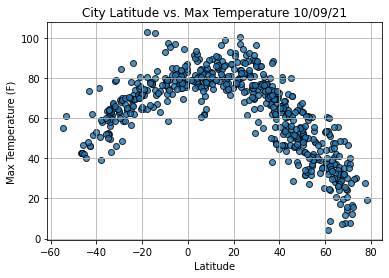

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

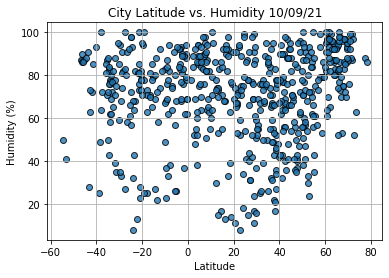

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


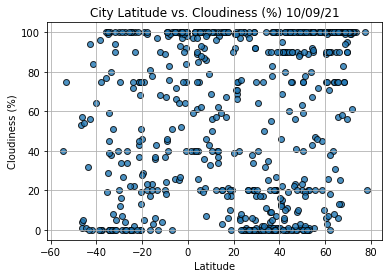

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

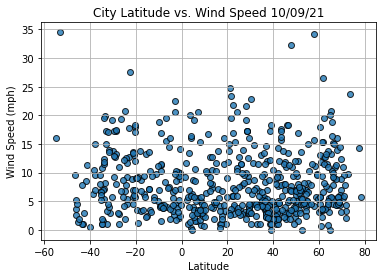

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Maryville,US,2021-10-09 18:52:44,35.7565,-83.9705,80.20,74,20,4.00
2,Hasaki,JP,2021-10-09 18:52:45,35.7333,140.8333,66.60,84,9,5.66
4,Kloulklubed,PW,2021-10-09 18:52:45,7.0419,134.2556,83.28,76,36,20.67
5,Murgab,TM,2021-10-09 18:52:46,37.4966,61.9714,49.87,43,0,6.91
6,Cerrito,CO,2021-10-09 18:52:46,6.8432,-72.6940,61.99,90,92,1.54


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

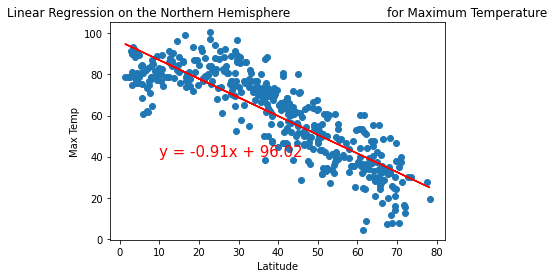

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

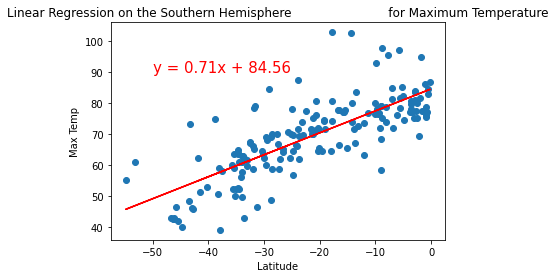

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

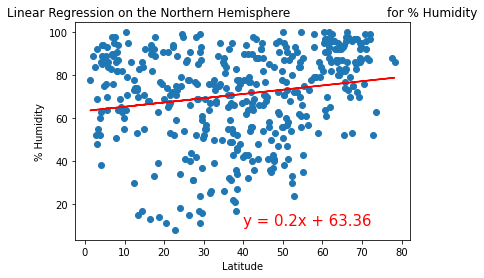

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


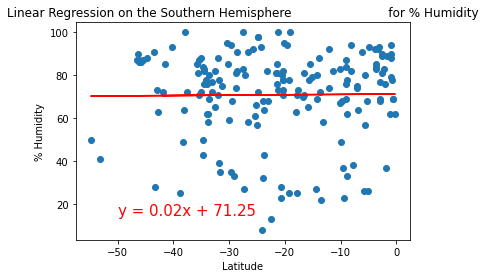

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

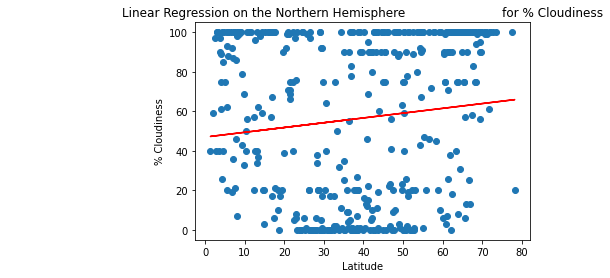

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

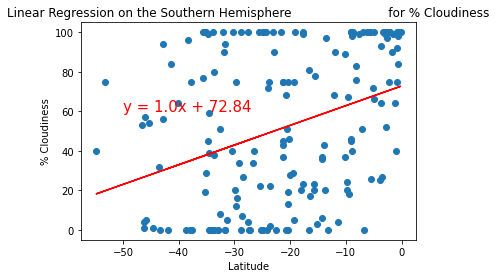

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

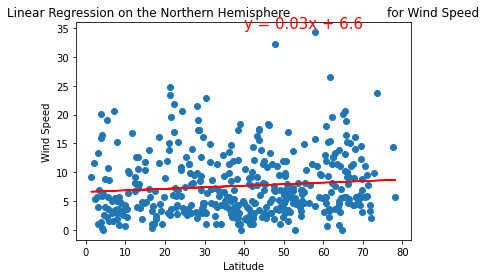

In [27]:
#  Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

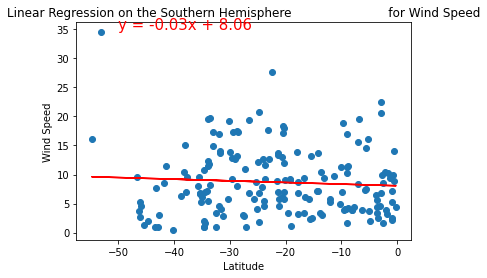

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))